In [12]:
import numpy as np
import pandas as pd

import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [7]:
print(boston_df)

     Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0             0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1             1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2             2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3             3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4             4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0   
502         502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0   
503         503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0   
504         504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0   
505         505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0   

       TAX  PTRATIO  LSTAT  MEDV  
0   

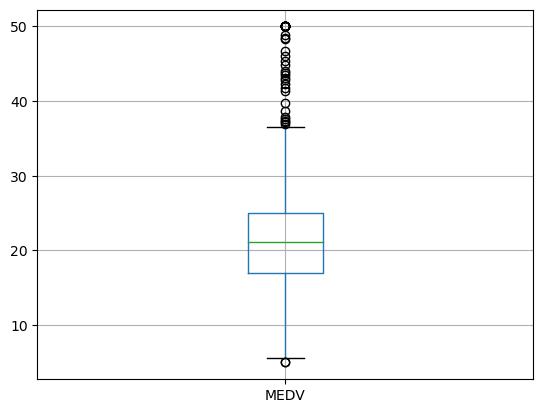

In [8]:
a = boston_df.boxplot(['MEDV'])

In [16]:
a = sns.catplot(x='CHAS', kind='count', data = boston_df)
a


In [10]:
import matplotlib.pyplot as plt

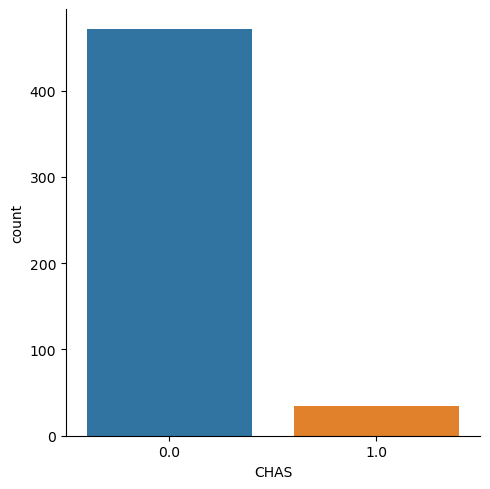

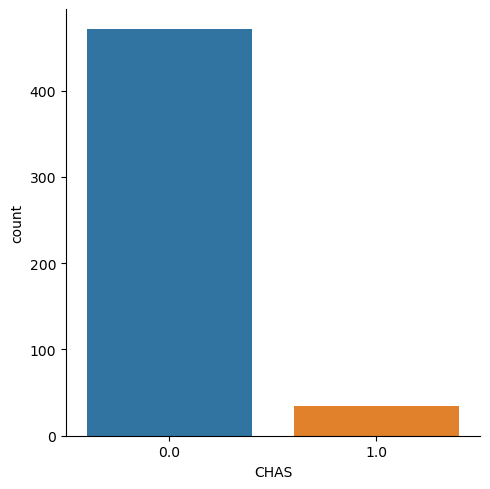

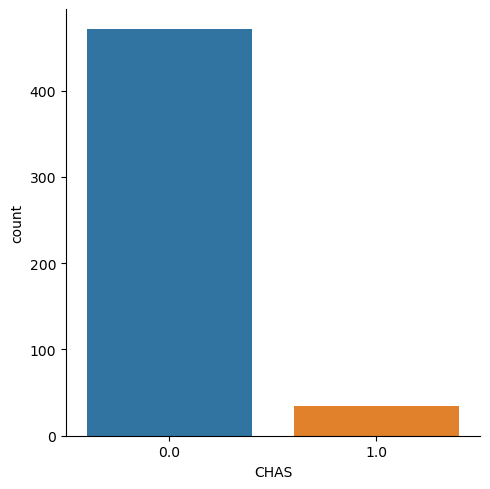

In [17]:
plt.show()

In [27]:
boston_df.loc[(boston_df['AGE']<=35), 'age_group'] == '35 years and younger'
boston_df.loc[(boston_df['AGE']>35)&(boston_df['AGE']<70), 'age_group'] == '35 years to 70 years'
boston_df.loc[(boston_df['AGE']>=70), 'age_group'] == '70 years and older'

x = sns.boxplot(x = 'age_group', y = 'MEDV', data = boston_df)

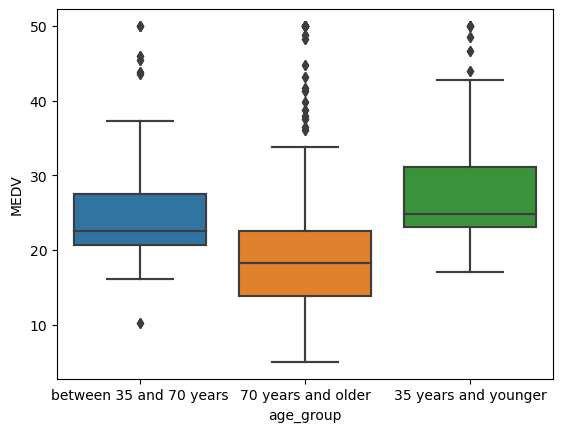

In [32]:
plt.show(x)

In [34]:
ax = sns.scatterplot(x='NOX',y='INDUS',data = boston_df)

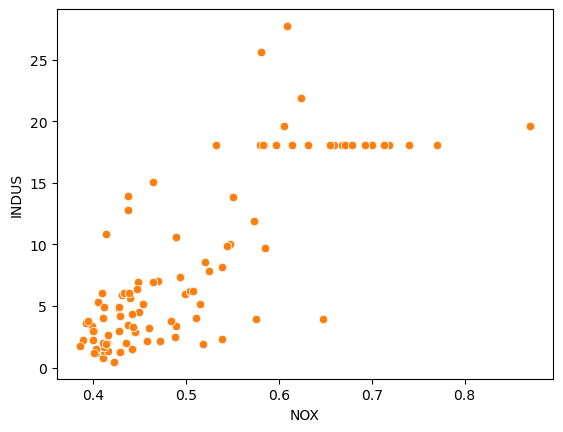

In [35]:
plt.show(ax)

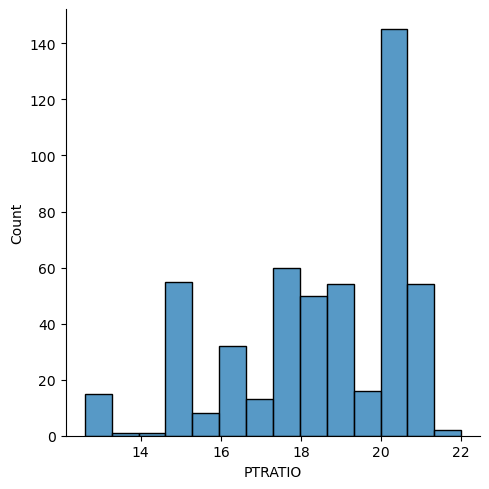

In [42]:
i = sns.displot(boston_df['PTRATIO'],kde=False)
plt.show(i)

In [43]:
    import scipy.stats

In [44]:
#Is there a significant difference in median value of houses bounded by the Charles river or not?
#Hypothesis:
#H0: µ1 = µ2("there is no difference in median value of houses bounded by the Charles river")
#H1: µ1 != µ2("there is a difference in median value of houses bounded by the Charles river")
scipy.stats.levene(boston_df[boston_df['CHAS']==0]['MEDV'],
                  boston_df[boston_df['CHAS']==1]['MEDV'], center = 'mean' )   

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [46]:
# since the p-value < 0.05, we can't not assume the equality of variance
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

In [47]:
# Since the p-value is less than 0.05 we reject the null hypothesis as there is enough proof that there is a statistical 
# difference in Median value of owner-occupied homes based on Charles river variable


In [ ]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

In [48]:
# Hypothesis:
# H0: µ1=µ2=µ3(the three means are equal)
# H1: At least one of the means differ

In [62]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'],
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'],
                   center = 'mean')

LeveneResult(statistic=nan, pvalue=nan)

In [55]:
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

In [53]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


In [ ]:
#Conclusion: Since the p-value is less than 0.05, we reject the null hypothesis as there is a significant evidence that 
#at least one of the means differ.

In [63]:
# Can we conclude that there is no relationship between Nitric oxide concentrations
# and proportion of non-retail business acres per town?

In [64]:
# Hypothesis:
# H0: both does not correlate
# H1: both correlate

In [65]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209162, pvalue=7.913361061232958e-98)

In [66]:
#Conclusion: the p-value<0.05 so we reject the null hypothesis and conclude there exists a relationship between them.

In [67]:
# What is the impact of an additional weighted distance to the five Boston employment centres
# on the median value of owner occupied homes?

In [68]:
#Hypothesis:
#H0: Dis is not correlated with MEDV
#H1: Dis is correlated with MEDV

In [72]:
X = boston_df['DIS']
Y = boston_df['MEDV']
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 22 Oct 2023   Prob (F-statistic):           1.21e-08
Time:                        20:12:10   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Conclusion: Since the p-value < 0.05, we reject the Null hypothesis and
# conclude that there exists a relationship between DIS and MEDV.